In [1]:
import pandas as pd
import numpy as np
import talib
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go


In [2]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [3]:
df =pd.read_excel('quotes.XLS')

In [4]:
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,Company,stc,NaN,NaN,NaN,NaN,NaN
1,Period,14/03/2021 – 11/03/2024,NaN,NaN,NaN,NaN,NaN
2,Ticker code,7010,NaN,NaN,NaN,NaN,NaN
3,Share,stc,NaN,NaN,NaN,NaN,
4,Currency,SAR,NaN,NaN,NaN,NaN,NaN


In [5]:
df.head(20)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,Company,stc,NaN,NaN,NaN,NaN,NaN
1,Period,14/03/2021 – 11/03/2024,NaN,NaN,NaN,NaN,NaN
2,Ticker code,7010,NaN,NaN,NaN,NaN,NaN
3,Share,stc,NaN,NaN,NaN,NaN,
4,Currency,SAR,NaN,NaN,NaN,NaN,NaN
5,Date,Open,High,Low,Close,Volume,NaN
6,2021-03-14 00:00:00,47.2,47.52,47.04,47.28,934543,NaN
7,2021-03-15 00:00:00,47.28,47.52,46.72,47.52,1149398,NaN
8,2021-03-16 00:00:00,47.28,47.76,47.2,47.6,1012633,NaN
9,2021-03-17 00:00:00,47.52,47.52,46.24,46.4,2277733,NaN


In [6]:
temp_df = df.iloc[5:].reset_index(drop=True)


In [7]:
df_new = pd.DataFrame(temp_df.values[1:], columns=temp_df.iloc[0])


In [8]:
df_new

,Date,Open,High,Low,Close,Volume,NaN
0,2021-03-14 00:00:00,47.2,47.52,47.04,47.28,934543,NaN
1,2021-03-15 00:00:00,47.28,47.52,46.72,47.52,1149398,NaN
2,2021-03-16 00:00:00,47.28,47.76,47.2,47.6,1012633,NaN
3,2021-03-17 00:00:00,47.52,47.52,46.24,46.4,2277733,NaN
4,2021-03-18 00:00:00,46.4,46.48,45.84,45.84,3354565,NaN
...,...,...,...,...,...,...,...
744,2024-03-07 00:00:00,41.25,41.4,41.05,41.15,1880307,NaN
745,2024-03-10 00:00:00,41.15,41.35,41.1,41.25,911055,NaN
746,2024-03-11 00:00:00,41.1,41.15,40.45,40.45,3189840,NaN
747,,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df_new = df_new.iloc[2:]

In [10]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 2 to 748
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    747 non-null    object
 1   Open    745 non-null    object
 2   High    745 non-null    object
 3   Low     745 non-null    object
 4   Close   745 non-null    object
 5   Volume  745 non-null    object
 6   nan     0 non-null      object
dtypes: object(7)
memory usage: 41.0+ KB


In [11]:
df_new.dropna(axis=1, how='all', inplace=True)

/var/folders/q9/r2j6s5gj6vqbgwbptm3ztjsc0000gn/T/ipykernel_43065/1402635807.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.dropna(axis=1, how='all', inplace=True)


In [12]:
df_new.head()

,Date,Open,High,Low,Close,Volume
2,2021-03-16 00:00:00,47.28,47.76,47.2,47.6,1012633
3,2021-03-17 00:00:00,47.52,47.52,46.24,46.4,2277733
4,2021-03-18 00:00:00,46.4,46.48,45.84,45.84,3354565
5,2021-03-21 00:00:00,45.6,46.08,45.52,45.76,1328480
6,2021-03-22 00:00:00,45.76,46.64,45.68,46.64,883070


In [13]:
df_new.set_index('Date', inplace=True)

df_new.describe()

,Open,High,Low,Close,Volume
count,745,745.00,745,745.0,745
unique,320,317.00,310,320.0,745
top,38,46.48,44,46.4,1012633
freq,10,10.00,10,13.0,1


<Axes: xlabel='Date'>

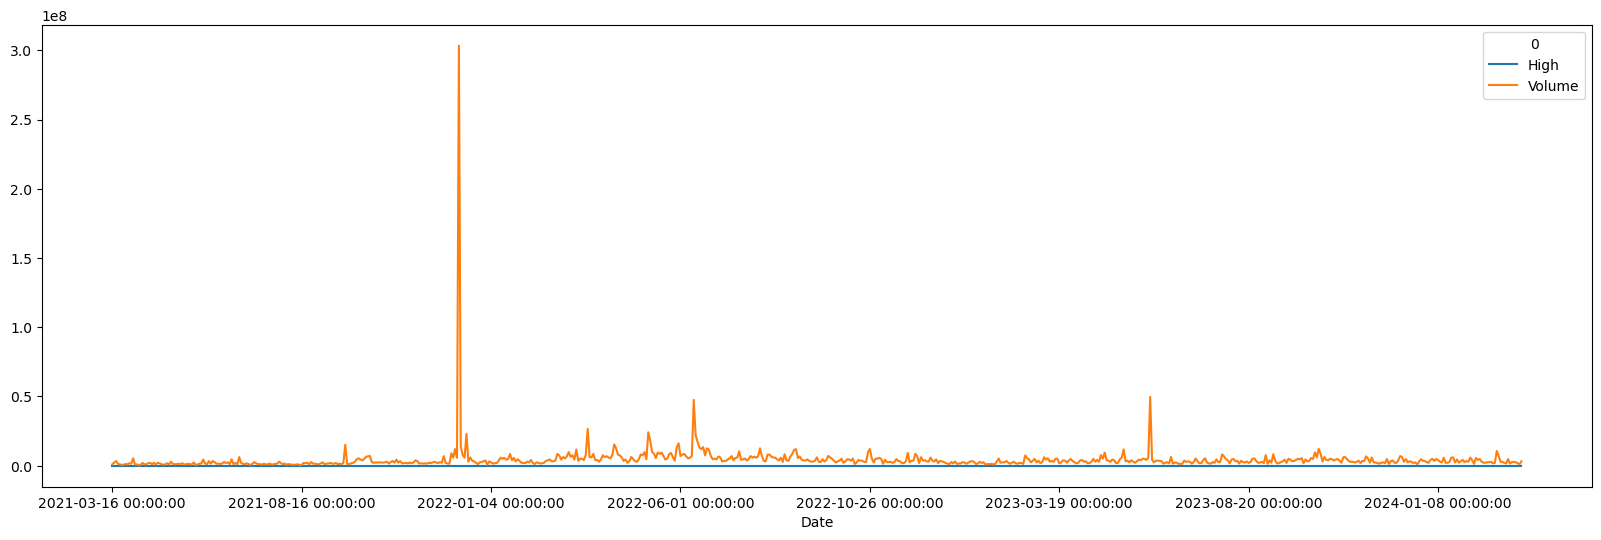

In [14]:
df_new[['High','Volume']].plot(figsize=(20,6))

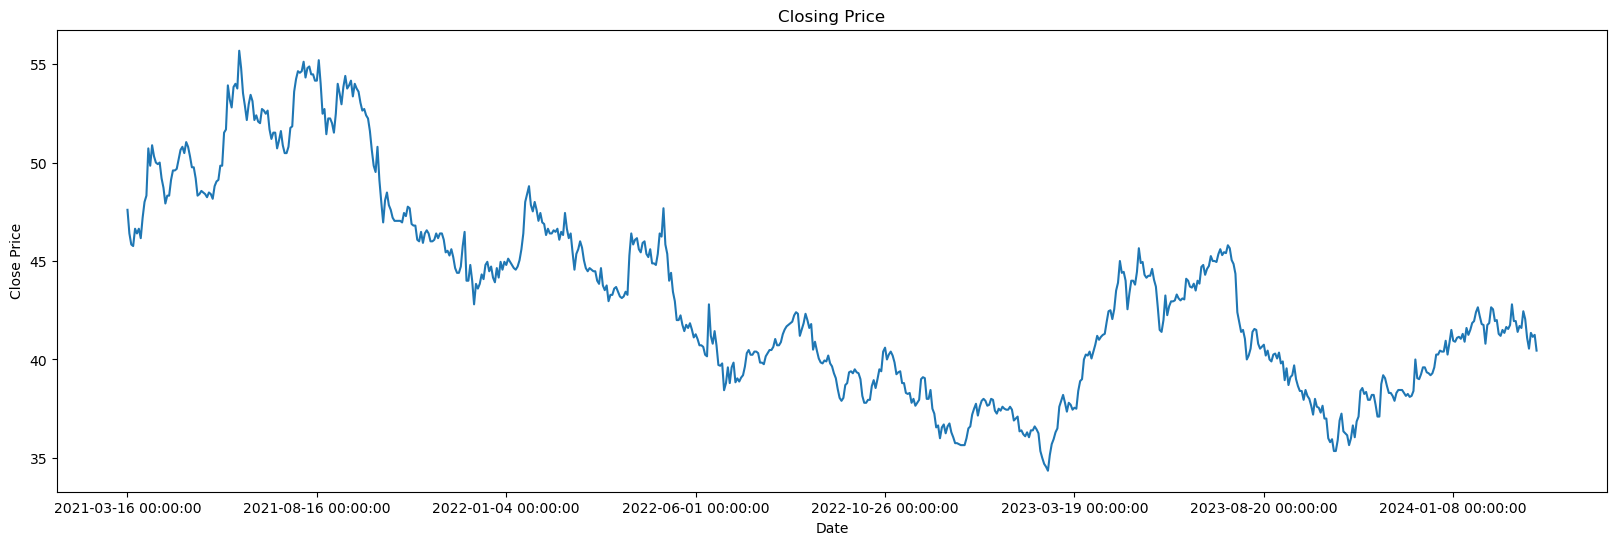

In [15]:
df_new['Close'].plot(figsize=(20, 6), title='Closing Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show() 

/var/folders/q9/r2j6s5gj6vqbgwbptm3ztjsc0000gn/T/ipykernel_43065/1425867112.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['MA50'] = df_new['Close'].rolling(window=50).mean()
/var/folders/q9/r2j6s5gj6vqbgwbptm3ztjsc0000gn/T/ipykernel_43065/1425867112.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['MA200'] = df_new['Close'].rolling(window=200).mean()


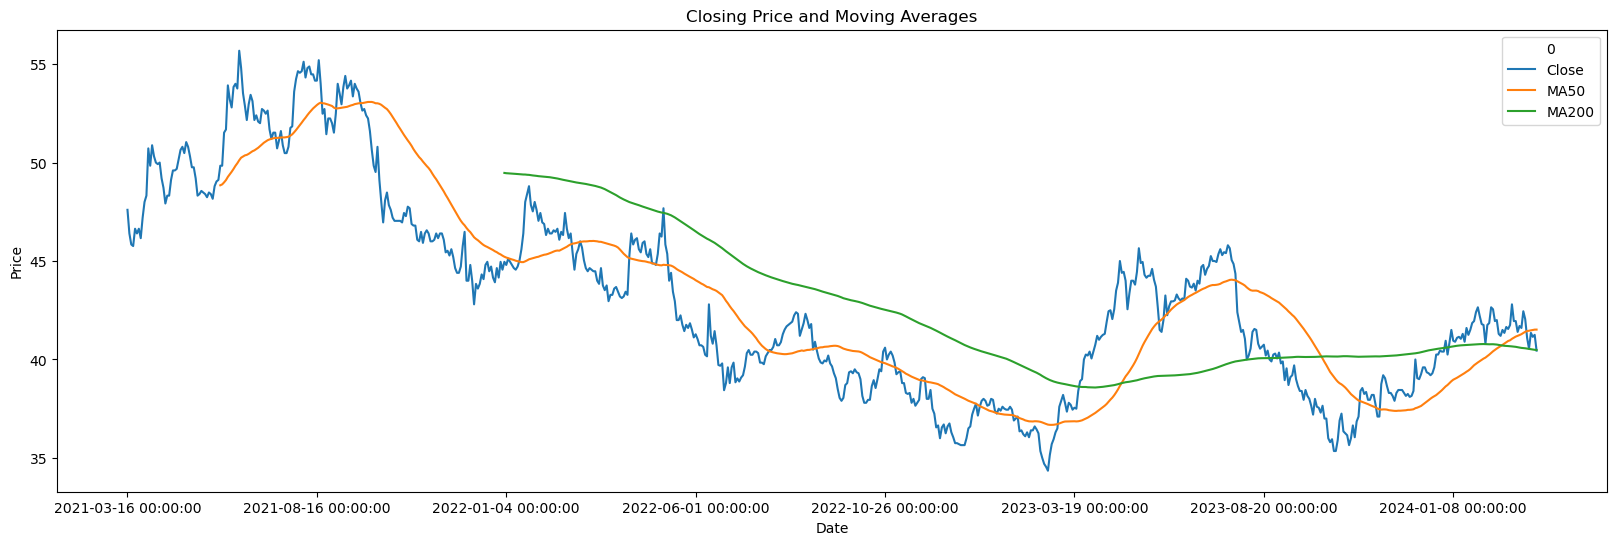

In [16]:
# Calculate moving averages
df_new['MA50'] = df_new['Close'].rolling(window=50).mean()
df_new['MA200'] = df_new['Close'].rolling(window=200).mean()

# Plot closing price and moving averages
df_new[['Close', 'MA50', 'MA200']].plot(figsize=(20, 6), title='Closing Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [17]:
print(df_new[['Open', 'High', 'Low', 'Close']].describe())


0       Open    High  Low  Close
count    745  745.00  745  745.0
unique   320  317.00  310  320.0
top       38   46.48   44   46.4
freq      10   10.00   10   13.0


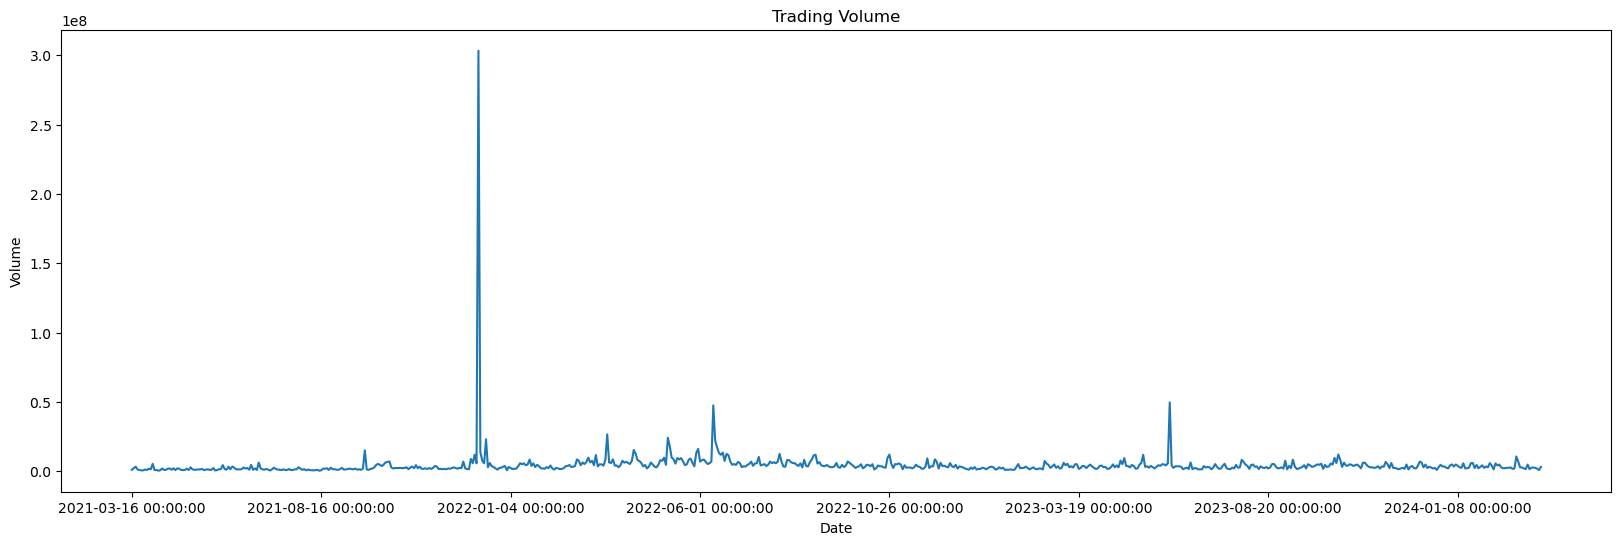

In [18]:
df_new['Volume'].plot(figsize=(20, 6), title='Trading Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

/var/folders/q9/r2j6s5gj6vqbgwbptm3ztjsc0000gn/T/ipykernel_43065/1237779931.py:1: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_new['Daily Return'] = df_new['Close'].pct_change()
/var/folders/q9/r2j6s5gj6vqbgwbptm3ztjsc0000gn/T/ipykernel_43065/1237779931.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_new['Daily Return'] = df_new['Close'].pct_change()
/var/folders/q9/r2j6s5gj6vqbgwbptm3ztjsc0000gn/T/ipykernel_43065/1237779931.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

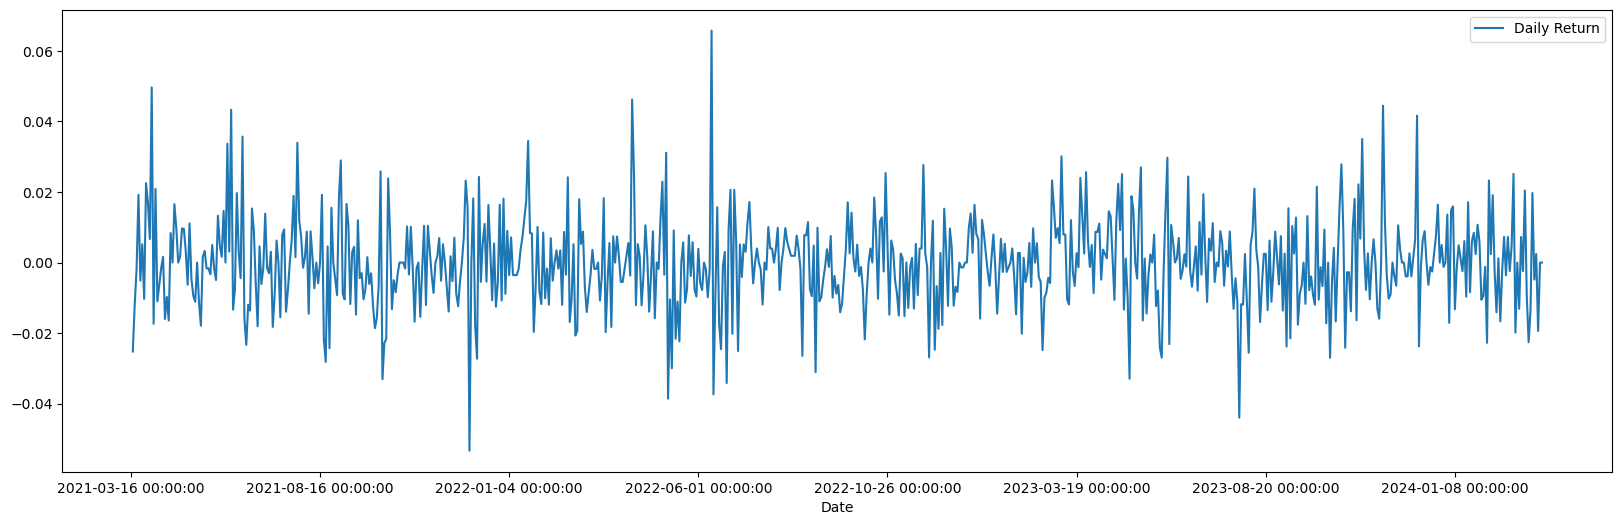

In [19]:
df_new['Daily Return'] = df_new['Close'].pct_change()
df_new['Daily Return'].plot(figsize=(20, 6), legend=True)
plt.show()

In [20]:
df_new

,Open,High,Low,Close,Volume,MA50,MA200,Daily Return
Date,,,,,,,,
2021-03-16 00:00:00,47.28,47.76,47.2,47.6,1012633,NaN,NaN,NaN
2021-03-17 00:00:00,47.52,47.52,46.24,46.4,2277733,NaN,NaN,-0.025210
2021-03-18 00:00:00,46.4,46.48,45.84,45.84,3354565,NaN,NaN,-0.012069
2021-03-21 00:00:00,45.6,46.08,45.52,45.76,1328480,NaN,NaN,-0.001745
2021-03-22 00:00:00,45.76,46.64,45.68,46.64,883070,NaN,NaN,0.019231
...,...,...,...,...,...,...,...,...
2024-03-07 00:00:00,41.25,41.4,41.05,41.15,1880307,41.500,40.50300,-0.004837
2024-03-10 00:00:00,41.15,41.35,41.1,41.25,911055,41.516,40.49075,0.002430
2024-03-11 00:00:00,41.1,41.15,40.45,40.45,3189840,41.517,40.47975,-0.019394


In [21]:
df_new['Close'] = pd.to_numeric(df_new['Close'], errors='coerce')

# Now, calculate the RSI
df_new['RSI'] = talib.RSI(df_new['Close'].values.astype(float), timeperiod=14)

/var/folders/q9/r2j6s5gj6vqbgwbptm3ztjsc0000gn/T/ipykernel_43065/2519169478.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Close'] = pd.to_numeric(df_new['Close'], errors='coerce')
/var/folders/q9/r2j6s5gj6vqbgwbptm3ztjsc0000gn/T/ipykernel_43065/2519169478.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['RSI'] = talib.RSI(df_new['Close'].values.astype(float), timeperiod=14)


In [22]:
df_new['macd'], df_new['macdsignal'], df_new['macdhist'] = talib.MACD(df_new['Close'], fastperiod=12, slowperiod=26, signalperiod=9)


/var/folders/q9/r2j6s5gj6vqbgwbptm3ztjsc0000gn/T/ipykernel_43065/81881262.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['macd'], df_new['macdsignal'], df_new['macdhist'] = talib.MACD(df_new['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
/var/folders/q9/r2j6s5gj6vqbgwbptm3ztjsc0000gn/T/ipykernel_43065/81881262.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['macd'], df_new['macdsignal'], df_new['macdhist'] = talib.MACD(df_new['Close'], fastperiod=12, slowperiod=26, signalperi

In [23]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=df_new.index,
                open=df_new['Open'],
                high=df_new['High'],
                low=df_new['Low'],
                close=df_new['Close'])])

fig.update_layout(title='Stock Price Candlestick Chart', xaxis_title='Date', yaxis_title='Price')
fig.show()


In [24]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=df_new.index,
                open=df_new['Open'],
                high=df_new['High'],
                low=df_new['Low'],
                close=df_new['Close'])])

fig.update_layout(title='Stock Price Candlestick Chart', xaxis_title='Date', yaxis_title='Price')

# Save the figure as an HTML file
fig.write_html("stock_chart.html")

# Open the HTML file in your web browser


<Axes: >

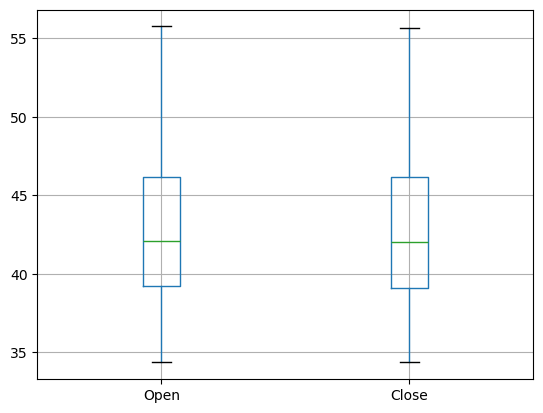

In [28]:
df_new[['Open','Close']].boxplot()

In [30]:
df_new['Open'] = df_new['Open'].astype(str).astype(float)
df_new['Volume'] = df_new['Volume'].astype(str).astype(float)


/var/folders/q9/r2j6s5gj6vqbgwbptm3ztjsc0000gn/T/ipykernel_43065/961292466.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/q9/r2j6s5gj6vqbgwbptm3ztjsc0000gn/T/ipykernel_43065/961292466.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [31]:
print(df_new[['Volume', 'Close']].describe())


0            Volume       Close
count  7.450000e+02  745.000000
mean   4.387609e+06   43.132013
std    1.160168e+07    4.988248
min    4.003350e+05   34.350000
25%    1.970390e+06   39.100000
50%    3.089428e+06   42.000000
75%    4.892097e+06   46.160000
max    3.032870e+08   55.680000


In [34]:
correlation = df_new.corr()
print(correlation)


0                 Open      High       Low     Close    Volume      MA50  \
0                                                                          
Open          1.000000  0.997563  0.997620  0.994429 -0.060601  0.908655   
High          0.997563  1.000000  0.997304  0.997526 -0.045331  0.905813   
Low           0.997620  0.997304  1.000000  0.997521 -0.066175  0.905593   
Close         0.994429  0.997526  0.997521  1.000000 -0.053375  0.900900   
Volume       -0.060601 -0.045331 -0.066175 -0.053375  1.000000  0.002817   
MA50          0.908655  0.905813  0.905593  0.900900  0.002817  1.000000   
MA200         0.558448  0.556422  0.551838  0.546540  0.276300  0.730883   
Daily Return -0.037194  0.006891  0.005693  0.054210 -0.045466 -0.059619   
RSI           0.208585  0.225481  0.226321  0.246812 -0.067215 -0.171228   
macd          0.276451  0.280749  0.282315  0.288541 -0.088307 -0.145069   
macdsignal    0.307723  0.309015  0.310098  0.312804 -0.085169 -0.099761   
macdhist    

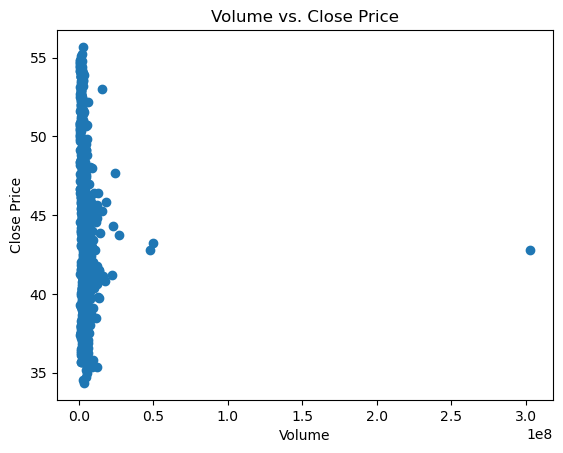

In [35]:
import matplotlib.pyplot as plt

plt.scatter(df_new['Volume'], df_new['Close'])
plt.title('Volume vs. Close Price')
plt.xlabel('Volume')
plt.ylabel('Close Price')
plt.show()


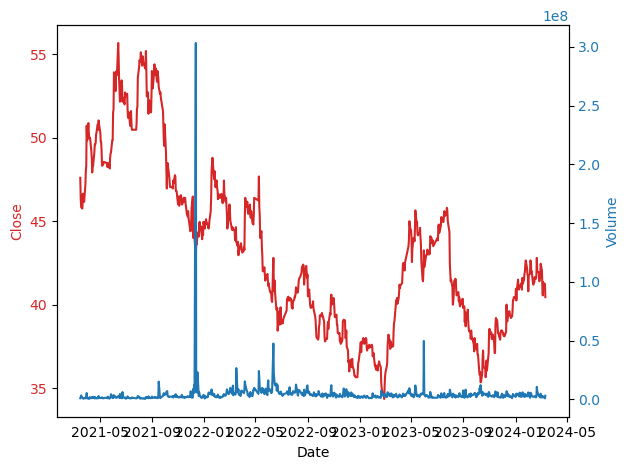

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df and df_new are your data frames

# Make sure both data frames have datetime index
df_new.index = pd.to_datetime(df_new.index)
df_new.index = pd.to_datetime(df_new.index, errors='coerce')  # Coerce errors to NaT for invalid entries

# Drop rows with invalid datetime index
df_new = df_new[pd.notnull(df_new.index)]

# Align the indices
df_aligned = df_new.reindex(df_new.index)

# Now plot
if 'Close' in df_aligned.columns:
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Close', color=color)
    ax1.plot(df_aligned.index, df_aligned['Close'], color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  
    color = 'tab:blue'
    ax2.set_ylabel('Volume', color=color)
    ax2.plot(df_new.index, df_new['Volume'], color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  
    plt.show()
else:
    print("The 'Close' column is not available in the DataFrame.")


In [63]:
# Assuming df is your DataFrame containing both 'Close' and 'Volume' columns

# Calculate percentage change in volume
df_new['VolumeChange'] = df_new['Volume'].pct_change()

# Calculate percentage change in close price
df_new['CloseChange'] = df_new['Open'].pct_change()

# Initialize a list to store the number of days until close price increase after volume increase
days_until_increase = []

# Define a window of time to consider
window_size = 10  # You can adjust this as needed

# Iterate through the data, skipping the first row since we are comparing with the next day
for i in range(1, len(df) - window_size):
    # Check if there is an increase in volume within the window
    if df_new['VolumeChange'].iloc[i:i+window_size].sum() > 0:
        # Check if there is an increase in close price within the window
        if df_new['CloseChange'].iloc[i+1:i+window_size+1].sum() > 0:
            # If both conditions are met, store the number of days until close price increase
            days_until_increase.append(i + window_size + 1)

# Output the results
if len(days_until_increase) > 0:
    print("After how many days after an increase in volume, the close price increases:")
    print(days_until_increase)
else:
    print("No instances found where an increase in volume is followed by an increase in the close price.")


After how many days after an increase in volume, the close price increases:
[12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 29, 30, 31, 32, 33, 34, 35, 36, 37, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 67, 68, 75, 76, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 103, 115, 116, 117, 118, 119, 120, 121, 122, 124, 125, 165, 166, 168, 180, 191, 192, 194, 195, 196, 197, 198, 199, 200, 201, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 220, 221, 233, 247, 266, 267, 268, 269, 270, 271, 272, 273, 275, 276, 283, 284, 285, 286, 308, 309, 312, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 341, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 355, 356, 357, 358, 359, 360, 361, 362, 385, 386, 387, 388, 389, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 421, 422, 426, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 461, 483, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509,

In [64]:
# Calculate the average number of days until close price increase after volume increase
average_days = sum(days_until_increase) / len(days_until_increase)

# Filter out instances where the number of days is greater than the average
days_greater_than_average = [days for days in days_until_increase if days > average_days]

# Output the refined results
if len(days_greater_than_average) > 0:
    print("Instances where the number of days until an increase in close price after an increase in volume is greater than the average:")
    print(days_greater_than_average)
else:
    print("No instances found where the number of days until an increase in close price after an increase in volume is greater than the average.")


Instances where the number of days until an increase in close price after an increase in volume is greater than the average:
[421, 422, 426, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 461, 483, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 512, 513, 514, 515, 516, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 556, 557, 558, 559, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 603, 604, 646, 648, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 690, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 710, 711, 712, 713, 714, 715, 716, 717, 718, 720, 721, 722, 723, 729, 733, 734, 735, 736, 737, 738, 739, 740, 751, 752]

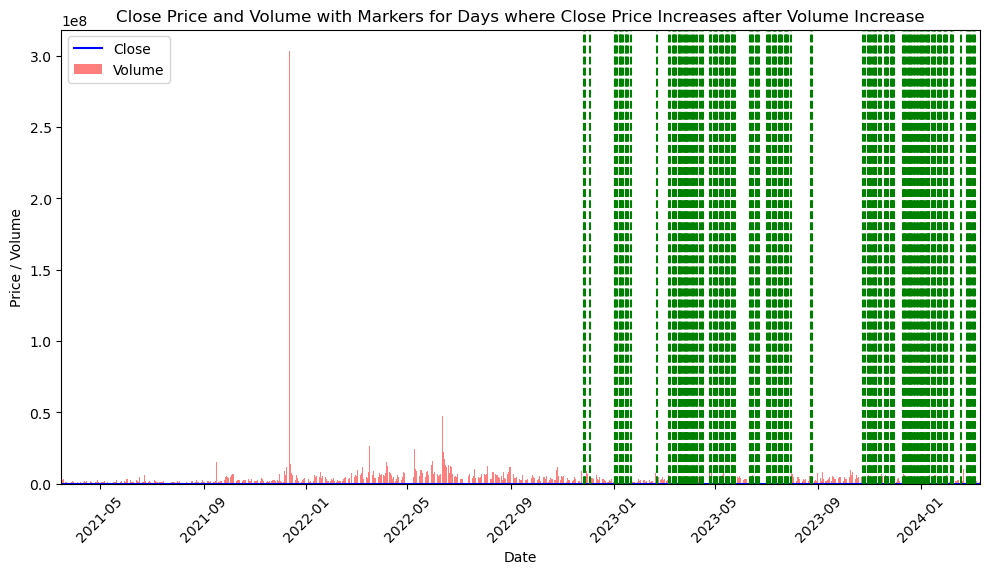

In [71]:
import matplotlib.pyplot as plt

# Plot the Close and Volume data within the range of your DataFrame index
plt.figure(figsize=(10, 6))
plt.plot(df_new.index, df_new['Close'], color='b', label='Close')
plt.bar(df_new.index, df_new['Volume'], color='r', alpha=0.5, width=1, label='Volume')

# Plot markers for the days where close price increases after volume increase
for day in days_greater_than_average:
    if day < len(df_new):  # Check if the day index is within the bounds of the DataFrame
        plt.axvline(df_new.index[day], color='g', linestyle='--')

plt.xlabel('Date')
plt.ylabel('Price / Volume')
plt.title('Close Price and Volume with Markers for Days where Close Price Increases after Volume Increase')
plt.legend()
plt.xticks(rotation=45)
plt.xlim(df_new.index.min(), df_new.index.max())  # Limit x-axis to the range of DataFrame index
plt.tight_layout()
plt.show()


In [85]:
# Update the window size to 10
window_size = 10  # Adjusted window size

# Calculate the average volume and close price
average_volume = df_new['Volume'].mean()
average_close = df_new['Open'].mean()

# Initialize a list to store the days when close price increases after an increase in volume
days_close_increase_after_volume = []

# Iterate through the data, skipping the first few rows since we need a window of data
for i in range(window_size, len(df_new)):
    # Check if volume for the past window_size days is above average
    if all(df_new['Volume'].iloc[i-window_size:i] > average_volume):
        # Check if close price for today is above average
        if df_new['Close'].iloc[i] > average_close:
            # Append the current day index to the list
            days_close_increase_after_volume.append(df_new.index[i])

# Output the results
if len(days_close_increase_after_volume) > 0:
    print("The stock takes on average", len(days_close_increase_after_volume), "days after an increase in volume to affect the close price.")
    print("Specific days when close price increases after an increase in volume within a window size of", window_size, "days:")
    print(days_close_increase_after_volume)
else:
    print("No instances found where an increase in volume affects the close price.")


The stock takes on average 6 days after an increase in volume to affect the close price.
Specific days when close price increases after an increase in volume within a window size of 10 days:
[Timestamp('2022-03-09 00:00:00'), Timestamp('2022-03-10 00:00:00'), Timestamp('2022-04-11 00:00:00'), Timestamp('2022-04-12 00:00:00'), Timestamp('2022-04-13 00:00:00'), Timestamp('2022-05-16 00:00:00')]


In [87]:
import pandas as pd

# Define a date range for workdays within the range of your DataFrame index
workdays_range = pd.bdate_range(start=df_new.index.min(), end=df_new.index.max())

# Filter the DataFrame to include only workdays
df_workdays = df_new.loc[df_new.index.isin(workdays_range)]

# Update the window size to 10
window_size = 10  # Adjusted window size

# Calculate the average volume and close price using workdays data
average_volume = df_workdays['Volume'].mean()
average_close = df_workdays['Open'].mean()

# Initialize a list to store the days when close price increases after an increase in volume
days_close_increase_after_volume = []

# Iterate through the workdays data, skipping the first few rows since we need a window of data
for i in range(window_size, len(df_workdays)):
    # Check if volume for the past window_size days is above average
    if all(df_workdays['Volume'].iloc[i-window_size:i] > average_volume):
        # Check if close price for today is above average
        if df_workdays['Close'].iloc[i] > average_close:
            # Append the current day index to the list
            days_close_increase_after_volume.append(df_workdays.index[i])

# Output the results
if len(days_close_increase_after_volume) > 0:
    print("The stock takes on average", len(days_close_increase_after_volume), "workdays after an increase in volume to affect the close price.")
    print("Specific workdays when close price increases after an increase in volume within a window size of", window_size, "workdays:")
    print(days_close_increase_after_volume)
else:
    print("No instances found where an increase in volume affects the close price on workdays.")


The stock takes on average 1 workdays after an increase in volume to affect the close price.
Specific workdays when close price increases after an increase in volume within a window size of 10 workdays:
[Timestamp('2022-04-13 00:00:00')]


In [88]:
import pandas as pd

# Assuming df is your DataFrame and it has 'Open' and 'Close' columns

# Step 1: Calculate the percentage variance for each row
df_new['Perc_Variance'] = ((df_new['Close'] - df_new['Open']) / df_new['Open']) * 100

# Step 2: Find the average of these percentage variances
average_variance = df_new['Perc_Variance'].mean()

print(f"Average Percentage Variance: {average_variance}%")


Average Percentage Variance: -0.11514269692291614%


<Axes: title={'center': 'Daily Returns'}, xlabel='Date'>

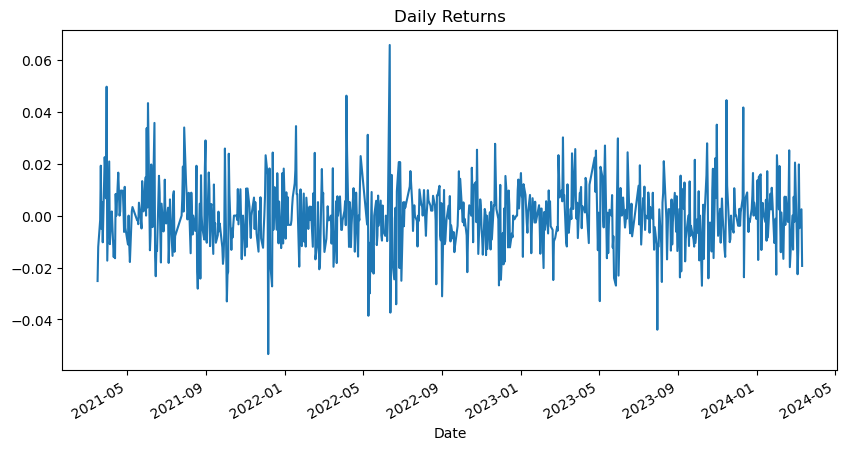

In [89]:
df_new['Daily Returns'] = df_new['Close'].pct_change()
df_new['Daily Returns'].plot(figsize=(10, 5), title="Daily Returns")


<Axes: title={'center': 'Moving Averages'}, xlabel='Date'>

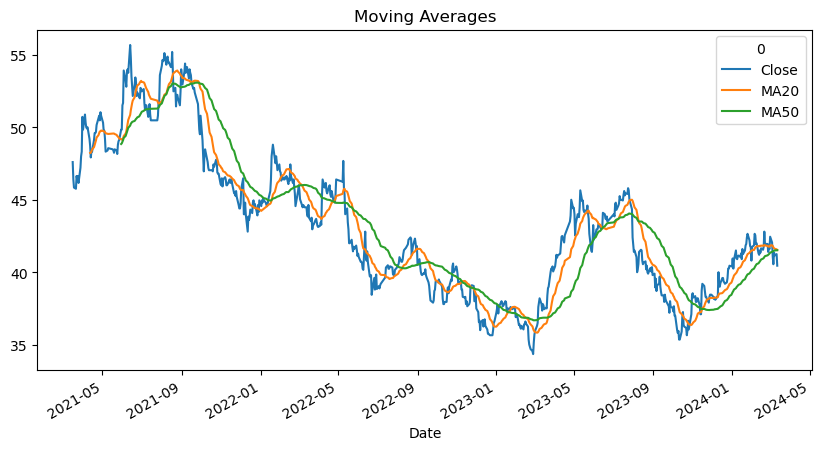

In [91]:
df_new['MA20'] = df_new['Close'].rolling(window=20).mean()
df_new['MA50'] = df_new['Close'].rolling(window=50).mean()
df_new[['Close', 'MA20', 'MA50']].plot(figsize=(10, 5), title="Moving Averages")